In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from pprint import pprint

In [4]:
df=pd.read_csv(r'C:\Users\user\Desktop\ML Data\Iris.csv')
df=df.drop("Id",axis=1)#deleting the index column

In [39]:
from sklearn.model_selection import train_test_split
df_train,df_test=train_test_split(df, test_size = 0.2, random_state = 0)
df_pd=df_train
data=df_train.values#For smaller dataset instead of pandas dataframe the use of data stored in numpy2D array
#makes the algorithm faster, so we are converting our data numpy2Darray

# Data pure?


Text(0, 0.5, 'Petal_length')

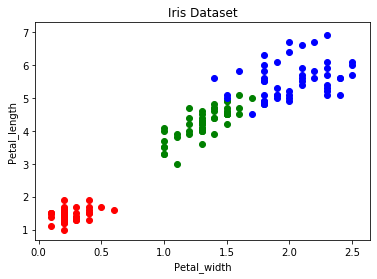

In [6]:
colors = {'Iris-setosa':'r', 'Iris-versicolor':'g', 'Iris-virginica':'b'}
# create a figure and axis
fig, ax = plt.subplots()
# plot each data-point
for i in range(len(df['PetalLengthCm'])):
    ax.scatter( df['PetalWidthCm'][i],df['PetalLengthCm'][i],color=colors[df['Species'][i]])
# set a title and labels
ax.set_title('Iris Dataset')
ax.set_xlabel('Petal_width')
ax.set_ylabel('Petal_length')

As we can see there are 3classes(red green blue),i.e, the data is not pure ; so we can't classify them easily.

# Function to check if the given data is pure or not?

In [20]:
def check_purity(data):
    label_column=data[:,-1]#we are accesing the last column ,i.e, the species(class) column
    unique_classes=np.unique(label_column)#unique function returns array of the distinct classes present in label_column
    if len(unique_classes)==1:# if there is only '1'class then the data is pure hence returning true
        return True
    else:
        return False#data is not pure as having multiple classes
    

# classify _fucntion

In [7]:
#if the data is pure you will clasify the data that which class they belong to ,
#but for very small data(size<5) we doesn't check the data is pure or not; instead 
#we take the class which present most no of of times in that case
def classify_data(data):
    label_column=data[:,-1]
    unique_classes,count_unique_classes=np.unique(label_column,return_counts=True)#here we also returning a numpy array(count_
    #unique_classes) containing the no of time each distinct classs appears in class column
    index=count_unique_classes.argmax()#argmax will return the index of maximum element in the ndarray,i.e,the maximum count
    #of presence of a particular class among the all the classes(although for large data will be pure and we will always get count 1)
    classification=unique_classes[index]
    return classification
    

# Potential_splits

In [8]:
def get_potential_splits(data):
    
    potential_splits={}#this a dictionary to hold the split values according the column indexes or features(which are the keys)
    _,n_columns=data.shape#no of columns of the data are stored in n_column variable
    
    for column_index in range(n_columns-1):
        potential_splits[column_index]=[]#for every itration,i.e,for each column/key, we are storing the corresponding 
        #potential_splits into a list so a creating a empty list 
        values=data[:,column_index]#we are taking values for all the rows for a given column index
        unique_values=np.unique(values)#and storing the unique values among them to a numpy array
        
        for index in range(len(unique_values)):#no by iterating over the no of unique values we will append the mid value between
            #two unique values and append to the the dictonary potential_split for the given column_index(feature)
           
            if index!=0:
                current_value=unique_values[index]
                previous_value=unique_values[index-1]
                potential_split=(current_value+previous_value)/2
                potential_splits[column_index].append(potential_split)
    
  
    return potential_splits
                
                
        

In [9]:
potential_splits=get_potential_splits(df_train.values)



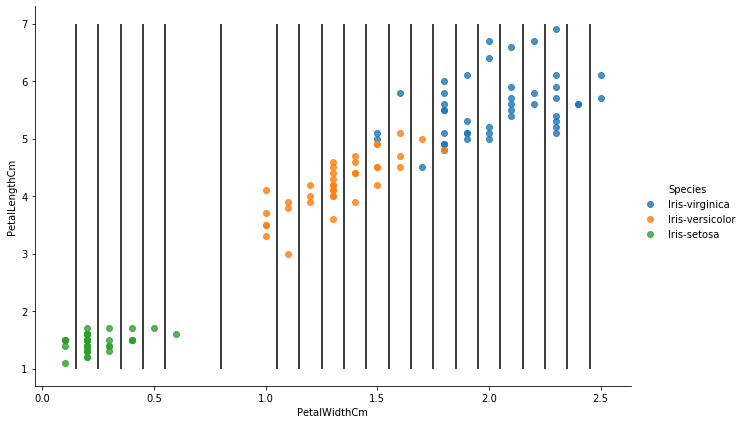

In [10]:
sns.lmplot(data=df_train,x="PetalWidthCm",y="PetalLengthCm",hue="Species",fit_reg=False,height=6,aspect=1.5)#scatter plot

plt.vlines(x=potential_splits[3],ymin=1,ymax=7)#we are drawing vertical splitting lines in accordance with column index=3,i.e,
#the feature "Petal_width"


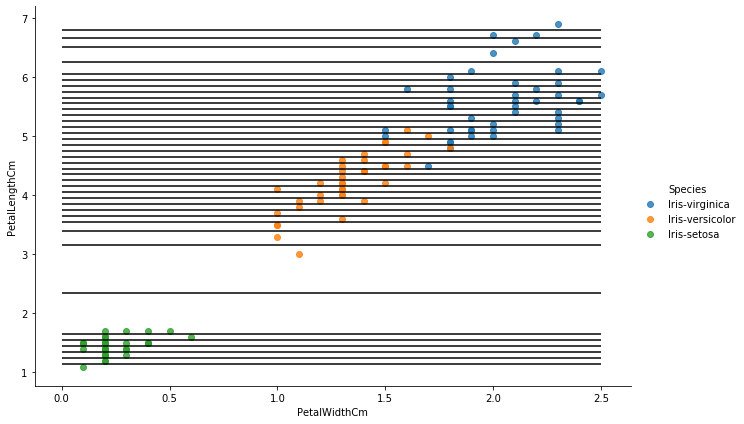

In [11]:
sns.lmplot(data=df_train,x="PetalWidthCm",y="PetalLengthCm",hue="Species",fit_reg=False,height=6,aspect=1.5)
plt.hlines(y=potential_splits[2],xmin=0,xmax=2.5)#we are drawing horizontal splitting lines in accordance with column 
#index=2,i.e,the feature "Petal_length"

# Lowest_overall_entropy

In [12]:
def calculate_entropy(data):
    lable_column=data[:,-1]
    _,counts=np.unique(lable_column,return_counts=True)#here we're only storing the no of times each class repeats in the class
    #column in to a numpy_array
    probabilities=counts/counts.sum()#as numpy do element wise opeartion "probabilities" is numpy_array containing the 
    #probabilties of each classes
    entropy=sum(probabilities*-np.log2(probabilities))
   
    return entropy

In [13]:
def calculate_information_gain(data,data_below,data_above):
    n_data_points=len(data_below)+len(data_above)
    
    p_data_below=len(data_below)/n_data_points
    p_data_above=len(data_above)/n_data_points
    
    information_gain=calculate_entropy(data)-((p_data_below*calculate_entropy(data_below)+p_data_above*calculate_entropy(data_above)))
    
    return information_gain

# split_data

In [14]:
def split_data(data,split_column,split_value):
    
    split_column_values=data[:,split_column]
    
    data_below=data[split_column_values <= split_value]
    data_above=data[split_column_values > split_value]
    
    return data_below,data_above

In [15]:
potential_splits=get_potential_splits(data)


In [16]:
def best_split_determination(data,potential_splits):
    max_information_gain=0
    for column_index in potential_splits:
        for value in potential_splits[column_index]:
            data_below,data_above=split_data(data,column_index,value)
            information_gain=calculate_information_gain(data,data_below,data_above)
            if information_gain>=max_information_gain:
                max_information_gain=information_gain
                best_split_column=column_index
                best_split_value=value
       
    return best_split_column,best_split_value
    

In [17]:
best_split_determination(data,potential_splits)

(3, 0.8)

# Decision Tree Algorithm


In [ ]:
example_tree={"petal_width<=0.8":["Iris_setosa",
                                  {"petal_width<=1.65":[{"petal_length<=4.9":["Iris_versicolor","Iris_virginica"]},
                                                        "Iris_verginica"]}]}

In [40]:
def decision_tree_algorithm(df,df_pd, counter=0):#df_pd is pandas_dataframe of training_data for getting the column names of best_split_columns
    #in the subtrees
    #data preperation; our fucntion is a recursie one for first call the data that goes to the function is of pandas data frame
    #but from second call it is converting to numpy2Darray for sake of faster algorithm , 
    #so only we need to convert the data to numpy2Darray in first call
    if counter==0:#for first call
        data=df.values
    else:
        data=df
        
    #base case
    if check_purity(data):#if data is pure
        classification =classify_data(data)
        return classification
    
    #recursive part
    else:
        counter+=1
        
        potential_splits=get_potential_splits(data)#all possible splits
        best_split_column,best_split_value=best_split_determination(data,potential_splits)#gives best split
        data_below,data_above=split_data(data,best_split_column,best_split_value)
        
        #initiate__sub-tree
        question= "{}<={}".format(df_pd.columns.values[best_split_column],best_split_value)#for example ("petal_width<=0.8")
        sub_tree={question: []}#into the empty list of dictionary we will append our yes_answer and no_answer
        
        #find answers 
        yes_answer=decision_tree_algorithm(data_below,df_pd, counter)
        no_answer=decision_tree_algorithm(data_above, df_pd,counter)
        
        sub_tree[question].append(yes_answer)
        sub_tree[question].append(no_answer)
        
        return sub_tree

In [41]:
tree=decision_tree_algorithm(df_train,df_pd)
tree

{'PetalWidthCm<=0.8': ['Iris-setosa',
  {'PetalWidthCm<=1.75': [{'PetalLengthCm<=4.95': [{'PetalWidthCm<=1.65': ['Iris-versicolor',
        'Iris-virginica']},
      {'PetalWidthCm<=1.55': ['Iris-virginica',
        {'PetalLengthCm<=5.449999999999999': ['Iris-versicolor',
          'Iris-virginica']}]}]},
    {'PetalLengthCm<=4.85': [{'SepalWidthCm<=3.1': ['Iris-virginica',
        'Iris-versicolor']},
      'Iris-virginica']}]}]}